# load libraries

In [1]:
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import utils

C:\Users\sai sriram\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sai sriram\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# set working directory and import the data

In [2]:
os.chdir("D:/project 2")
os.getcwd()
data_frame = pd.read_excel("Absenteeism_at_work_Project.xls")

# checking type and verifying whether data has imported or not

In [3]:
data_frame.head(2)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0


# Checking the data types and converting into required ones.

In [4]:
#conversion of datatypes into numerics

for columns in ['Transportation expense','Distance from Residence to Work','Service time','Age',
                'Hit target','Son','Pet','Weight','Body mass index','Absenteeism time in hours','Height']: 
    
        data_frame[columns] = data_frame[columns].astype('float') 

#conversion into categorical

for columns in ['Reason for absence', 'Month of absence', 'Day of the week','ID',
             'Disciplinary failure', 'Education', 'Seasons', 'Social drinker','Social smoker']:
    
        data_frame[columns] = data_frame[columns].astype('object')
      

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 737 non-null object
Month of absence                   739 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null object
Education                          730 non-null object
Son                                734 non-null float64
Social drinker                     737 non-null object
Social smoker                      736 non-null object
Pet     

# Data Pre-Processing

In [6]:
data_frame.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

# Missing Value Analysis

In [7]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(data_frame.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data_frame))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_percent.csv", index = False)

In [8]:
#imputation method
#Actual value = 248
#Mean = 220
#Median = 225

#create missing value
data_frame['Transportation expense'].loc[70]

248.0

In [9]:
data_frame['Transportation expense'].loc[70] = np.nan

C:\Users\sai sriram\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, data_frame.shape[1]):
    #print(i)
    if(data_frame.iloc[:,i].dtypes == 'object'):
        data_frame.iloc[:,i] = pd.Categorical(data_frame.iloc[:,i])
        #print(marketing_train[[i]])
        data_frame.iloc[:,i] = data_frame.iloc[:,i].cat.codes 
        data_frame.iloc[:,i] = data_frame.iloc[:,i].astype('object')
        
        lis.append(data_frame.columns[i])


In [11]:
#replace -1 with NA to impute
for i in range(0, data_frame.shape[1]):
    data_frame.iloc[:,i] = data_frame.iloc[:,i].replace(-1, np.nan) 

#Impute with mean
#data_frame['Transportation expense'] = data_frame['Transportation expense'].fillna(data_frame['Transportation expense'].mean())

#Impute with median
#data_frame['Transportation expense'] = data_frame['Transportation expense'].fillna(data_frame['Transportation expense'].median())

In [12]:
#Impute with median
data_frame['Absenteeism time in hours'] = data_frame['Absenteeism time in hours'].fillna(data_frame['Absenteeism time in hours'].median())
data_frame['Body mass index'] = data_frame['Body mass index'].fillna(data_frame['Body mass index'].median())
data_frame['Height'] = data_frame['Height'].fillna(data_frame['Height'].median())
data_frame['Weight'] = data_frame['Weight'].fillna(data_frame['Weight'].median())
data_frame['Pet'] = data_frame['Pet'].fillna(data_frame['Pet'].median())
data_frame['Social smoker'] = data_frame['Social smoker'].fillna(data_frame['Social smoker'].median())
data_frame['Social drinker'] = data_frame['Social drinker'].fillna(data_frame['Social drinker'].median())
data_frame['Son'] = data_frame['Son'].fillna(data_frame['Son'].median())
data_frame['Education'] = data_frame['Education'].fillna(data_frame['Education'].median())
data_frame['Disciplinary failure'] = data_frame['Disciplinary failure'].fillna(data_frame['Disciplinary failure'].median())
data_frame['Hit target'] = data_frame['Hit target'].fillna(data_frame['Hit target'].median())
data_frame['Age'] = data_frame['Age'].fillna(data_frame['Age'].median())
data_frame['Service time'] = data_frame['Service time'].fillna(data_frame['Service time'].median())
data_frame['Distance from Residence to Work'] = data_frame['Distance from Residence to Work'].fillna(data_frame['Distance from Residence to Work'].median())
data_frame['Transportation expense'] = data_frame['Transportation expense'].fillna(data_frame['Transportation expense'].median())
data_frame['Month of absence'] = data_frame['Month of absence'].fillna(data_frame['Month of absence'].median())
data_frame['Reason for absence'] = data_frame['Reason for absence'].fillna(data_frame['Reason for absence'].median())
data_frame['Work load Average/day '] = data_frame['Work load Average/day '].fillna(data_frame['Work load Average/day '].median())



In [13]:
data_frame.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [15]:
num_var =  [ "Transportation expense", "Distance from Residence to Work", "Service time","Age",
            "Hit target","Son","Pet","Height", "Body mass index","Weight", "Absenteeism time in hours"]

# Feature selection

In [16]:
##Correlation analysis
#Correlation plot
df_corr = data_frame.loc[:,num_var]

In [17]:
num_var =  [ "Transportation expense", "Distance from Residence to Work", "Service time","Age",
            "Hit target","Son","Pet","Height", "Body mass index","Weight", "Absenteeism time in hours"]

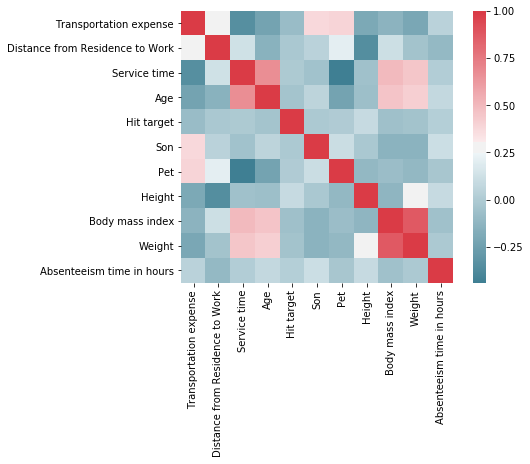

In [18]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('correlation.png')

In [19]:
#Chisquare test of independence
#Save categorical variables 

cat_var = ["Reason for absence", "Month of absence", "Day of the week","ID",
             "Disciplinary failure", "Education", "Seasons", "Social drinker","Social smoker"]

In [20]:
#loop for chi square values
for i in cat_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data_frame['Absenteeism time in hours'], data_frame[i]))
    print(p)

Reason for absence
7.262525646531397e-126
Month of absence
2.5138924624334413e-08
Day of the week
0.003021081110471532
ID
3.4969703324549064e-10
Disciplinary failure
2.811327292697691e-103
Education
0.966890372726654
Seasons
1.0699164671285167e-06
Social drinker
0.0023832329972678858
Social smoker
0.5104529781136267


# Dimension Reduction

In [21]:
#feature reduction
#ID,Body.mass.index, Education, Social.smoker, Social.drinker, Seasons, Disciplinary.failure

#data_frame = data_frame.drop(['Body mass index','Social smoker', 'Education'], axis=1)
data_frame = data_frame.drop(['ID','Body mass index','Social smoker', 'Education','Social drinker', 'Seasons', 'Disciplinary failure'], axis=1)
#data_frame.shape

# Normalization

In [23]:
num_var =  [ "Transportation expense", "Distance from Residence to Work", "Service time","Age",
            "Hit target","Son","Pet","Height","Weight", "Absenteeism time in hours"]

data_frame.shape
#Nomalisation
for i in num_var:
    print(i)
    data_frame[i] = (data_frame[i] - min(data_frame[i]))/(max(data_frame[i]) - min(data_frame[i]))

Transportation expense
Distance from Residence to Work
Service time
Age
Hit target
Son
Pet
Height
Weight
Absenteeism time in hours


# writing the processed data back to directory

In [24]:
data_frame.to_excel("processed_data.xls")
data_frame.shape

(740, 14)

# Model Development

In [25]:
#Dividing the processed data into train and test
x = data_frame.values[:, 0:13]
y = data_frame.values[:,13]
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

# Decision tree for regression

In [26]:
fit_DT = DecisionTreeRegressor(max_depth=2).fit(x,y)

# Prediction on test data

In [27]:
predictions_DT = fit_DT.predict(data_frame.values[:,0:13])

# Defining rmse for evaluating performance of model

In [28]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [29]:
rmse(data_frame.values[:,13], predictions_DT)

0.11600601900777739

In [30]:
#RandomForest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)

In [31]:
rf_predictions = rf_model.predict(x_test)

In [36]:
print("RMSLE Value: ", rmse(y_test,rf_predictions))

RMSLE Value:  0.08219949365267865
